# **Ocean Mixing Story Group 1**

## Background 

This project aims to better understand the statistical significance of reconstructing global pCO₂ fields using ML trained on sparse data. It extends upon the analysis carried out by **Gloege et al. (2021)** *"Quantifying Errors in Observationally Based Estimates of Ocean Carbon Sink Variability."* and the method of **Bennington et al. (2022)** *"Explicit Physical Knowledge in Machine Learning for Ocean Carbon Flux Reconstruction: The pCO2-Residual Method"* by introducing a new ML method, NGBoost, which gives a probablistic prediction instead of XGBoost's point prediction. By introducting probablistic information, including standard deviations, scientists can understand the statistical confidence of models and how that confidence changes with the introduction of additional data. 

Oceans have absorbed 38% of all anthropogenic fossil fuel emissions over the industrial era. Yet, the scientific communitity is uncertain whether oceans will continue to absorb the same amount of carbon. Accurate estimations of air–sea CO₂ flux are critical for understanding the current and future global carbon budget, but are challenging due to the sparse and unevenly distributed nature of surface ocean pCO₂ observations. 

Probablistic predictions provide additional understanding of current models based on this sparse and uneven observations versus point-based predictions. By better discerning confidence in pCO2 reconstructions, scientists can more accurately convey recommendations based on the models, such as more accurately answer questions related to carbon budgets and other scientific and socio-economic questions related to climate change. Additionally, this research can inform scientific funding, helping to answer whether more real-world pCO₂ observations are needed for more accurate models.   

## Goals 

This analysis has two goals:
1. Determine the **statistical confidence and variability** of the pCO₂ reconstructions across the globe
2. Investigate how **adding more observations** affects statistical confidence and variability

Results from this investigation will help answer where there is more variation in the data and likewise where there is greater confidence in the pCO₂ reconstructions.

Furthermore, this analysis will help answer the degree to which adding data will improve the confidence of reconstruction models generally. Going a step deeper, this investigation can give insight into whether it is more important to add more observations in locations historically sampled, or in locations not in the database. Relatedly, this research can inform which areas of the globe are most important to direct funding towards sampling, or to focus other statistical technique to improve model confidence. 

## ML model 

Both NGBoost and XGBoost are gradient boosting algorithms. NGBoost is a gradient boosting algorithm that focuses on probabilistic predictions and uncertainty estimation, while XGBoost is a general-purpose gradient boosting algorithm known for its accuracy and efficiency.

The NGBoost method is more resource intensive than XGBoost. As such, this analysis focuses on one ESM model and 3 members.

# NGBoost vs XGBoost: A Comparison of Two Gradient Boosting Methods

## Introduction

**Gradient Boosting** is one of the most powerful machine learning techniques for structured/tabular data. **XGBoost** is a well-known implementation focused on high performance and scalability, while **NGBoost (Natural Gradient Boosting)** introduces a novel twist: it provides **probabilistic predictions with uncertainty estimates**.

This document compares the two in terms of capability, use cases, and implementation.

---

## Overview Comparison

| Feature | NGBoost | XGBoost |
|--------|---------|---------|
| Output | Probabilistic (distributions) | Point estimate (single value) |
| Uncertainty Estimation | ✅ Yes (explicit) | ❌ No (requires external methods) |
| Based on Gradient Boosting | ✅ Yes | ✅ Yes |
| Base Learner | Decision Trees (default) | Decision Trees (default) |
| Target Use | Regression with uncertainty, risk-sensitive decisions | General-purpose regression/classification |
| Key Innovation | Natural Gradient for distribution parameter learning | Regularized, efficient gradient boosting |
| Open Source Repo | [NGBoost GitHub](https://github.com/stanfordmlgroup/ngboost) | [XGBoost GitHub](https://github.com/dmlc/xgboost) |

---

## Point Prediction vs Probabilistic Prediction

| Question | XGBoost Output | NGBoost Output |
|---------|----------------|----------------|
| What’s the temperature at noon tomorrow? | 73.4°F | 𝑁(73.4, 1.5²) |
| How long will this patient live? | 11.3 months | Gamma(α=2.3, β=5.2) |

In many real-world applications, having an estimate of **how uncertain** a prediction is can be more valuable than the prediction itself.

---

## Modular Design of NGBoost

NGBoost is designed with three modular components:

1. **Base Learner**: Usually decision trees, but customizable.
2. **Distribution**: e.g. Normal, Exponential, Poisson – depends on target type.
3. **Scoring Rule**: LogScore (maximum likelihood), CRPS, etc.

---

## Core Algorithm Difference

### XGBoost
- Minimizes a custom loss (e.g. MSE, LogLoss)
- Adds weak learners to correct residuals
- Outputs a **single point prediction**

### NGBoost
- Models the **entire predictive distribution**
- Learns parameters (e.g. mean, std) using **natural gradients**
- Outputs a **full probability distribution**

---

## Code Example: XGBoost (Regression)

```python
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=1000, n_features=10, noise=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = XGBRegressor()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
```
## Code Example: NGBoost (Probabilistic Regression)
```python
from ngboost import NGBRegressor
from ngboost.distns import Normal
from ngboost.scores import LogScore
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=1000, n_features=10, noise=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

ngb = NGBRegressor(Dist=Normal, Score=LogScore)
ngb.fit(X_train, y_train)

# Predict mean of distribution
y_pred = ngb.predict(X_test)

# Predict full distribution
y_dists = ngb.pred_dist(X_test)
means = y_dists.loc  # mean
stds = y_dists.scale  # std deviation


## Adding Observations

In section 2, there is an investigation of how adding data to the model affects statistical confidence and variability. In particular, we investigate adding data across 2 dimensions:

1. Adding more observations at locations that have historically been sampled. 
2. Adding new locations, not previously sampled for pCO2 concentrations.

In both methods, we investigate increasing sampling by 14%, 30%, and 50% compared to current observations. In 1., this research adds more observations to locations that have historically been sampled. In 2., this research focuses on adding new locations in 3 undersampled Ocean Basins: Southern Ocean, Indian Ocean, and Pacific Ocean between Australia and South America. (Arctic areas were not added given the lack of coverage in ESMs).   

## Key Findings

**Baseline**
1. Mean pCO2 varies from 220 - 440 uatm. There is generally greater pCO2 off the western coasts of Africa and the Americas as well as by the equator. Lower pCO2 levels are seen closer to the poles.
2. Standard deviation pattern somewhat resembles the pCO2 patterns, with greater standard deviations by the western coasts of Africa and the Americas as well as by the equater, and lower standard deviations by the poles.
3. Baseline pCO2 reconstructions are moderately statistically significant, with about 67% of the global reconstructions being statistically significant

**Adding Sampling**
1. Adding data changes model averages
2. See reduced standard deviations of pCO2 in areas where add hypothetical observations. Get larger local standard deviation reductions by increasing data additions, or by concentrating the data sampling.
3. Adding samples increases the amount of statistical significances. The more data added, the more statistically confident the results.
4. The denser additions seen with the new location data adds increases statistical confidence of the pCO2 reconstructions more that the dispersed sampling additions.  

**Reproducibility**
1. Results are reproducible across members, with statistical significance increasing in areas where add additional values

**Seasonality**
1. greater changes to model pCO2 results compared to baseline when add sampling data in Autumn and Spring

## Structure:

0. Setup
1. Understanding Surface pCO₂ Sampling
2. Training NGBoost Model
3. Stastistical Analysis of pCO₂ Reconstructions
4. Testing Additional Members
5. Conclusion

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
your_username = 'donvic777'  # username of the person running the code. Reviewers should also change this to their own username.

#To allow the reviewer to access the saved files, provide notebook owner's username here:  
owner_username = 'azamkhan99'  # Reviewer should not change this name

# 1. Setup Workspace and Import Packages


In [3]:
%%capture
!pip install tensorflow
!pip install keras
!pip install --upgrade ngboost

In [27]:
%%capture
### standard imports ###
import numpy as np
import pandas as pd
import xarray as xr
import gcsfs
### Python file with supporting functions ###
# standard imports
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import sys
# Redirect all low-level stderr output
sys.stderr = open(os.devnull, 'w')

import datetime
from collections import defaultdict
import random
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth',100)
import csv
import cmocean as cm

# machine learning libraries
import xgboost as xgb     
from xgboost import XGBRegressor

from ngboost import NGBRegressor
from ngboost.distns import Normal
from ngboost.scores import LogScore

# Change to the parent directory of the current working directory. (Run only once—otherwise it will keep moving up the directory tree)
os.chdir(os.path.dirname(os.getcwd()))
print("Current working directory:", os.getcwd())

# Python file with supporting functions
import lib.residual_utils as supporting_functions
from lib.visualization import *
from lib.bias_figure2 import concat_datasets, XarrayEvaluator
from lib.corr_figure3 import eval_spatial
import lib.group1_utils as g1u

In [5]:
from lib.config import (
    SOCAT_PATH,
    PATH_SEEDS,
    GRID_SEARCH_APPROACH,
    MLINPUTS_PATH,
    ENSEMBLE_DIR,
    FEATURES_SEL,
    TARGET_SEL,
)

In [6]:
### Setting the date range to unify the date type ###

# Define date range
date_range_start = '2004-01-01T00:00:00.000000000'
date_range_end = '2023-12-31T00:00:00.000000000'

# create date vector, adds 14 days to start & end
dates = pd.date_range(start=date_range_start, 
                      end=date_range_end,freq='MS')


init_date = str(dates[0].year) + format(dates[0].month,'02d')
fin_date = str(dates[-1].year) + format(dates[-1].month,'02d')

# 2. Surface ocean pCO2: A sparse data challenge

Analyze stastical metrics of real-world & theoretical sampling of pCO₂

## 2.1
### 🔹 Original Mask

- **`socat_mask_data`**  
  The baseline SOCAT sampling mask, showing where and when surface ocean pCO₂ has been measured.

---

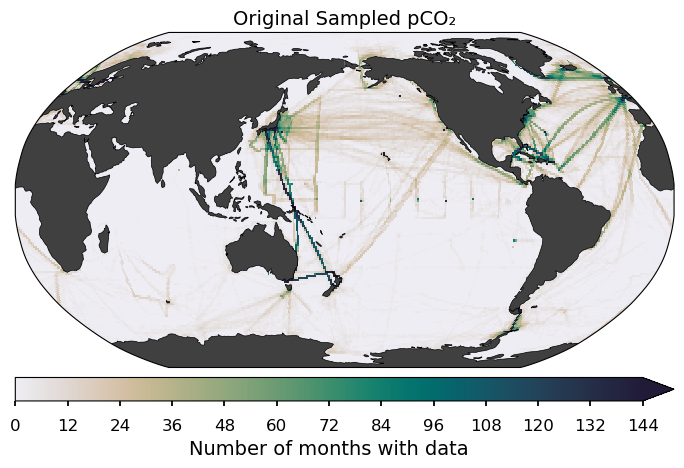

/srv/conda/envs/notebook/lib/python3.12/site-packages/dask/array/numpy_compat.py:57: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/srv/conda/envs/notebook/lib/python3.12/site-packages/dask/array/numpy_compat.py:57: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/srv/conda/envs/notebook/lib/python3.12/site-packages/dask/array/numpy_compat.py:57: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


In [7]:
socat_mask_data = xr.open_zarr(SOCAT_PATH).sel(time=slice(str(dates[0]),str(dates[-1])))

non_zero_counts = (socat_mask_data.socat_mask != 0).sum(dim="time")
plot_style = "seaborn-v0_8-talk"

plot_mask(non_zero_counts, "Original Sampled pCO₂")

Here, we visualize all SOCAT data for the period selected for this analysis (default is 2004-2023) at each 1 degree X 1 degree location (100x100km at the equator). 

Data is sparse, with only around 2% of the globe sampled. The majority of the sampling is in the northern hemisphere

## 2.2
## Adding More Locations

This notebook investigates how different sampling strategies affect the statistical confidence of pCO₂ reconstructions.  

In both methods, we investigate samples increases of 14%, 30%, and 50%. "Augmenting existing locations" looks at adding more data to locations that have already been sampled historically, while "adding new locations" only looks to add data in places that have not historically been sampled. 

Given the methodology, both methods tend to add data outside of typical shipping routes, especially in the Southern Hemisphere. The "adding new locations" is more concentrated in the additions, while the new data in "augmenting existing" is more dispersed. 

---

### 2.2.1
### 🔸 Augmenting Existing Sampled Locations

These variants **increase the number of samples at already-sampled locations** without changing the spatial coverage.

- **`socat_mean_glob`**  
  Boosts under-sampled locations (below global mean) to the global mean number of sampling months (14% increase).

- **`socat_30p_glob`**  
  Ensures all existing sampled grid cells have at least 7 months of data (≈30% increase).

- **`socat_50p_glob`**  
  Ensures all existing sampled grid cells have at least 10 months of data (≈50% increase).

---

In [8]:
#Add more sampling to areas with low historical sampling
mean_val_glob_loc, socat_mean_glob, thirtyp_val_glob, socat_30p_glob, fiftyp_val_glob, socat_50p_glob = g1u.add_to_existing(non_zero_counts, socat_mask_data)

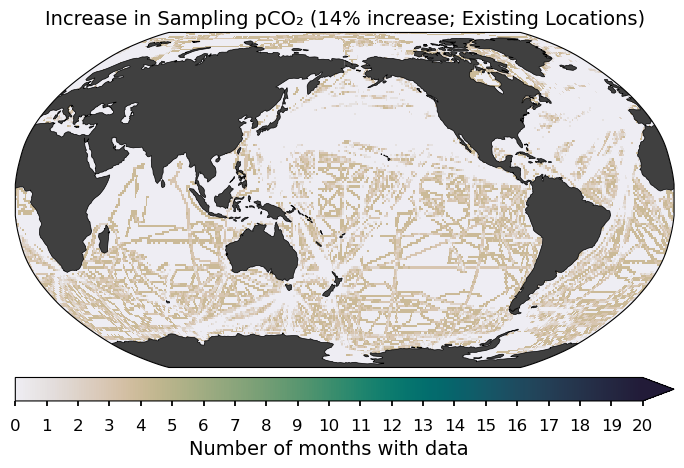

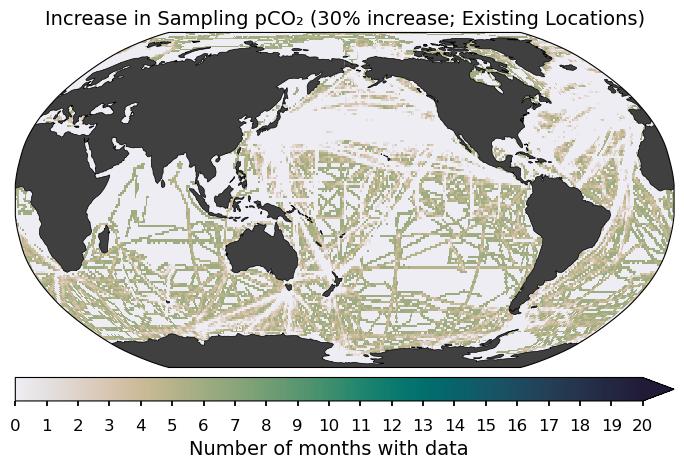

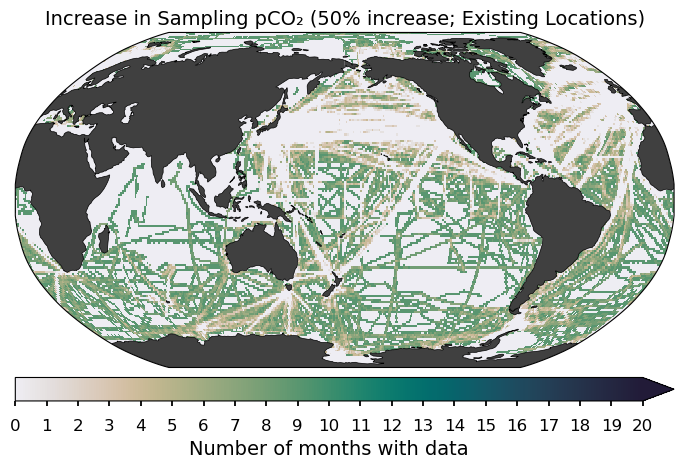

In [9]:
##WRITE DIFFERENT LABEL FOR CHANGE IN NUMBER OF MONTHS)
diff_mean = mean_val_glob_loc - non_zero_counts
diff_30p  = thirtyp_val_glob  - non_zero_counts
diff_50p  = fiftyp_val_glob   - non_zero_counts

#visualize increase in sampling
plot_mask(diff_mean, "Increase in Sampling pCO₂ (14% increase; Existing Locations)",vrange=[0,20,1])
plot_mask(diff_30p, "Increase in Sampling pCO₂ (30% increase; Existing Locations)",vrange=[0,20,1])
plot_mask(diff_50p, "Increase in Sampling pCO₂ (50% increase; Existing Locations)",vrange=[0,20,1])

### 2.2.2
### 🔸 Adding New Sample Locations

These variants **expand the spatial footprint** by adding sampling at new locations in undersampled ocean regions.

- **`addmeanp_socat`**  
  Adds ~14% new grid points in each of the three undersampled basins, sampled at the global mean frequency.

- **`add30p_socat`**  
  Adds 100 new grid points per basin, each with moderate sampling (~7 months).

- **`add50p_socat`**  
  Adds 200 new grid points per basin, each with higher sampling (~10 months).

---

<table style="border-collapse: collapse; width: 100%;">
  <tr>
    <th style="border: 1px solid black;">Region</th>
    <th style="border: 1px solid black;">Latitude Range</th>
    <th style="border: 1px solid black;">Longitude Range</th>
  </tr>
  <tr>
    <td style="border: 1px solid black;">Pacific 1</td>
    <td style="border: 1px solid black;">-46 to -36</td>
    <td style="border: 1px solid black;">-97 to -87</td>
  </tr>
  <tr>
    <td style="border: 1px solid black;">Pacific 2</td>
    <td style="border: 1px solid black;">-45 to -35</td>
    <td style="border: 1px solid black;">-130 to -110</td>
  </tr>
  <tr>
    <td style="border: 1px solid black;">Pacific 3</td>
    <td style="border: 1px solid black;">-32 to -27</td>
    <td style="border: 1px solid black;">-141 to -121</td>
  </tr>
  <tr>
    <td style="border: 1px solid black;">Southern Ocean</td>
    <td style="border: 1px solid black;">-76 to -67</td>
    <td style="border: 1px solid black;">-60 to -40</td>
  </tr>
  <tr>
    <td style="border: 1px solid black;">Indian Ocean 1</td>
    <td style="border: 1px solid black;">-11 to 9</td>
    <td style="border: 1px solid black;">75 to 85</td>
  </tr>
  <tr>
    <td style="border: 1px solid black;">Indian Ocean 2</td>
    <td style="border: 1px solid black;">-30 to -25</td>
    <td style="border: 1px solid black;">70 to 90</td>
  </tr>
</table>

In [10]:
addmeanp_oceans, addmeanp_socat, add30p_oceans, add30p_socat, \
    add50p_oceans, add50p_socat = g1u.add_new(non_zero_counts, socat_mask_data)


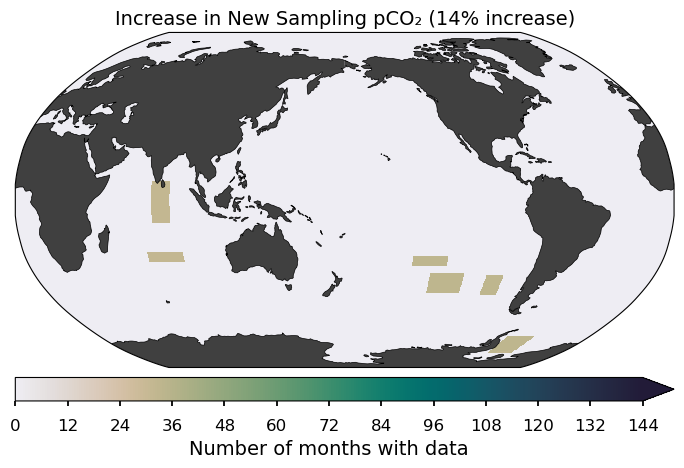

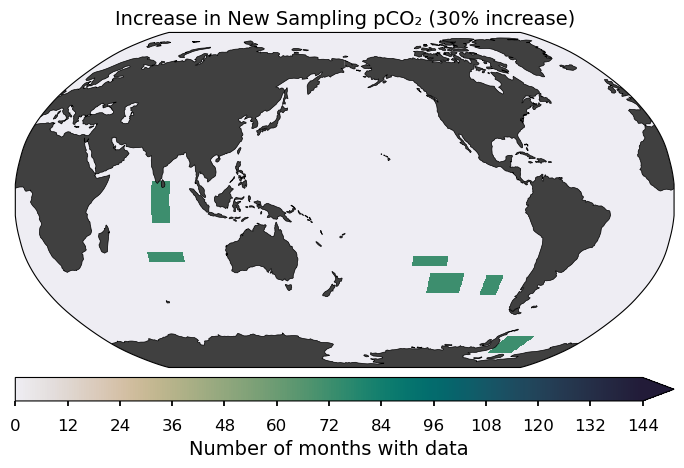

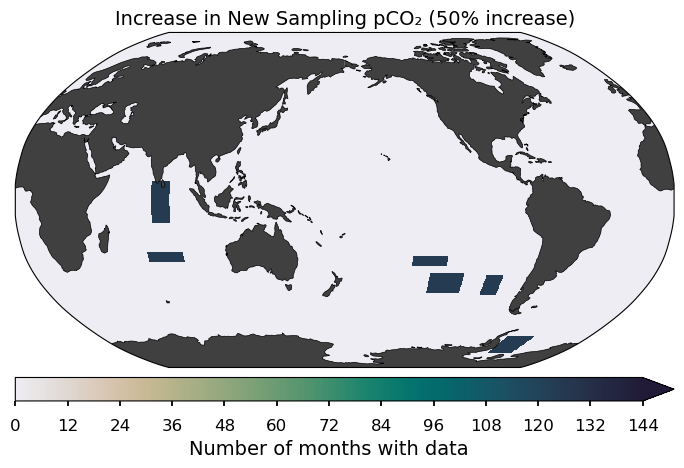

In [11]:
diff_mean_n = addmeanp_oceans - non_zero_counts
diff_30p_n  = add30p_oceans  - non_zero_counts
diff_50p_n  = add50p_oceans   - non_zero_counts

#visualize increase in sampling
plot_mask(diff_mean_n, "Increase in New Sampling pCO₂ (14% increase)")
plot_mask(diff_30p_n, "Increase in New Sampling pCO₂ (30% increase)")
plot_mask(diff_50p_n, "Increase in New Sampling pCO₂ (50% increase)")

In [12]:
mask_data_dict = {
    "baseline": socat_mask_data,
    "densify_mean_pattern": socat_mean_glob,
    "densify_30p": socat_30p_glob,
    "densify_50p": socat_50p_glob,
    "expand_14p": addmeanp_socat,
    "expand_30p": add30p_socat,
    "expand_50p": add50p_socat,
}

# 3. NGBoost Model Training

### 3.1 Training with NGBoost on observations

In [13]:
### train-validate-test split proportions ###

select_dates = []
test_dates = []

for i in range(0, len(dates)):
    if i % 5 != 0:
        select_dates.append(dates[i])  ### 80% train days set ###
    if i % 5 == 0:
        test_dates.append(dates[i])  ### 20% test days set ###

### Then, the month numbers above are converted back to their respective datetime objects.

year_mon = []

for i in range(0, len(select_dates)):
    tmp = select_dates[i]
    year_mon.append(f"{tmp.year}-{tmp.month}")

test_year_mon = []

for i in range(0, len(test_dates)):
    tmp = test_dates[i]
    test_year_mon.append(f"{tmp.year}-{tmp.month}")

In [14]:
features_sel = FEATURES_SEL
target_sel = TARGET_SEL

path_seeds = PATH_SEEDS
grid_search_approach = GRID_SEARCH_APPROACH
MLinputs_path = MLINPUTS_PATH
ensemble_dir = ENSEMBLE_DIR

output_dir = f"gs://leap-persistent/{your_username}/{owner_username}/pco2_residual/{grid_search_approach}/post02_xgb"  # where to save machine learning results
metrics_output_dir = f"{output_dir}/metrics"  # where to save performance metrics
test_perform_fname = f"{metrics_output_dir}/ngb_test_performance_{init_date}-{fin_date}.csv"  # path for test performance metrics

In [15]:
ngb_params = {
    "n_estimators": 500,  # Number of boosting rounds
    "learning_rate": 0.05,  # Learning rate
    "natural_gradient": True,  # Use natural gradient
    "minibatch_frac": 0.8,  # Proportion of data used per iteration
    "col_sample": 0.8,  # Feature proportion per tree
    "verbose": True,  # Disable training output
    "Score": LogScore,  # Loss function
    "early_stopping_rounds": 25,  # Early stopping rounds
}

In [16]:
selected_mems_dict = {
    "ACCESS-ESM1-5": ["member_r10i1p1f1", "member_r5i1p1f1", "member_r2i1p1f1"],
}

In [ ]:
# Call the function
g1u.run_ngboost_with_masks(
    mask_data_dict=mask_data_dict,
    selected_mems_dict=selected_mems_dict,
    features_sel=features_sel,
    target_sel=target_sel,
    year_mon=year_mon,
    test_year_mon=test_year_mon,
    path_seeds=path_seeds,
    MLinputs_path=MLinputs_path,
    dates=dates,
    init_date=init_date,
    fin_date=fin_date,
    output_dir=output_dir,
    params=ngb_params,  # NGBoost parameters
    runthiscell=-1,  # -1 = first member of first ensemble only (use 1 to run all)
)

### 3.2 Reconstruction pCO₂ using ESMs

In [17]:
seed_loc_dict = defaultdict(dict)
for ens, mem_list in selected_mems_dict.items():
    sub_dictt = {mem: no for no, mem in enumerate(mem_list)}
    seed_loc_dict[ens] = sub_dictt

In [ ]:
g1u.run_reconstruction_with_masks(
    mask_data_dict=mask_data_dict,
    selected_mems_dict=selected_mems_dict,
    features_sel=features_sel,
    target_sel=target_sel,
    year_mon=year_mon,
    test_year_mon=test_year_mon,
    seed_loc_dict=seed_loc_dict,
    MLinputs_path=MLinputs_path,
    init_date=init_date,
    fin_date=fin_date,
    output_dir=output_dir,
    dates=dates,
    runthiscell=-1,  # -1 = first member of first ensemble only (use 1 to run all)
)

### 3.3 Inverse Residual Transformation

In [18]:
runthiscell = -1  # 0 will turn off, 1 will turn on, -1 will only run first member

if runthiscell:
    # Use the first masks if only testing with the first ensemble member
    if runthiscell == -1:
        first_mask = list(mask_data_dict.keys())[0]
        run_selected_mask_data_dict = {first_mask: mask_data_dict[first_mask]}
    else:
        run_selected_mask_data_dict = mask_data_dict

    for mask_name, mask_data in run_selected_mask_data_dict.items():
        print(f"Processing mask: {mask_name}")

        g1u.calc_recon_pco2(
            regridded_members_dir=ensemble_dir,
            pco2_recon_dir=f"{output_dir}/reconstructions/{mask_name}",
            selected_mems_dict=selected_mems_dict,
            mask_name=mask_name,
            init_date=init_date,
            fin_date=fin_date,
            owner_name=owner_username,
            your_username=your_username,
        )

        print(f"Finished processing mask: {mask_name}")

Processing mask: baseline
Reviewing process: Running ML only for the first member of the first ESM, loading remaining reconstructed data from the notebook owner.
Current ESM: ACCESS-ESM1-5
On member member_r10i1p1f1
pco2T path: gs://leap-persistent/abbysh/pco2_all_members_1982-2023/00_regridded_members/ACCESS-ESM1-5/member_r10i1p1f1/ACCESS-ESM1-5.r10i1p1f1.Omon.zarr
pCO2R path: gs://leap-persistent/donvic777/azamkhan99/pco2_residual/nmse/post02_xgb/reconstructions/baseline/ACCESS-ESM1-5/member_r10i1p1f1/recon_pCO2residual_ACCESS-ESM1-5_member_r10i1p1f1_mon_1x1_200401_202312.zarr
save path: gs://leap-persistent/donvic777/azamkhan99/pco2_residual/nmse/post02_xgb/reconstructions/baseline/ACCESS-ESM1-5/member_r10i1p1f1/recon_pCO2_ACCESS-ESM1-5_member_r10i1p1f1_mon_1x1_200401_202312.zarr
finished with member_r10i1p1f1
Finished processing mask: baseline


# *** Reviewers should not run this cell ***

In [ ]:
from google.cloud import storage

if runthiscell != -1:
    client = storage.Client()
    bucket = client.bucket("leap-persistent")

    for mask_name, mask_data in mask_data_dict.items():
        print(f"Processing mask: {mask_name}")

        # Define the prefix for the blobs you want to make public
        prefix = f"{your_username}/{your_username}/pco2_residual/nmse/post02_xgb/reconstructions/{mask_name}/"
        blobs = bucket.list_blobs(prefix=prefix)

        seen_dirs = (
            set()
        )
        # Track top-level directories (immediate subdirectories of `reconstructions`)
        for blob in blobs:
            # Extract the relative path after `reconstructions/`
            relative_path = blob.name[len(prefix) :]
            top_level_dir = relative_path.split("/")[0]
            # print(relative_path)


            # Get first component
            try:
                # Make the file public
                blob.make_public()

                # Only print if it's a new top-level directory
                if top_level_dir not in seen_dirs:
                    seen_dirs.add(top_level_dir)
                    print(f"Made public: {top_level_dir}")
                    # print(seen_dirs)
            except Exception as e:
                print(f"Failed to make public: {blob.name}")
                print(e)

# 4 Analyzing Model Reconstruction

In [19]:
from lib.visualization import *

## 4.1 Reconstruction of Baseline

##### A. Average pCO2 over timeseries

Loading truth data...
  Globbing for truth data in: gs://gs://leap-persistent/abbysh/pco2_all_members_1982-2023/00_regridded_members/ACCESS-ESM1-5/member_r10i1p1f1/*.zarr
  Found truth data path: gs://leap-persistent/abbysh/pco2_all_members_1982-2023/00_regridded_members/ACCESS-ESM1-5/member_r10i1p1f1/ACCESS-ESM1-5.r10i1p1f1.Omon.zarr
Loading reconstruction data...
  Recon path: gs://leap-persistent/donvic777/azamkhan99/pco2_residual/nmse/post02_xgb/reconstructions/baseline/ACCESS-ESM1-5/member_r10i1p1f1/recon_pCO2_ACCESS-ESM1-5_member_r10i1p1f1_mon_1x1_200401_202312.zarr
  No member dimension found in reconstruction.
Loading mask data...
Calculating time averages...
  Averaging and dimension checks complete.
Aligning longitudes...
Masking averaged truth data where average mask presence < 0.01...
Generating side-by-side plot...


/home/jovyan/ReconstructOceanCarbonP3G1/Project3-ReconstructPCO2/lib/visualization.py:768: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.1, 1, 0.95])  # Adjust layout for colorbar


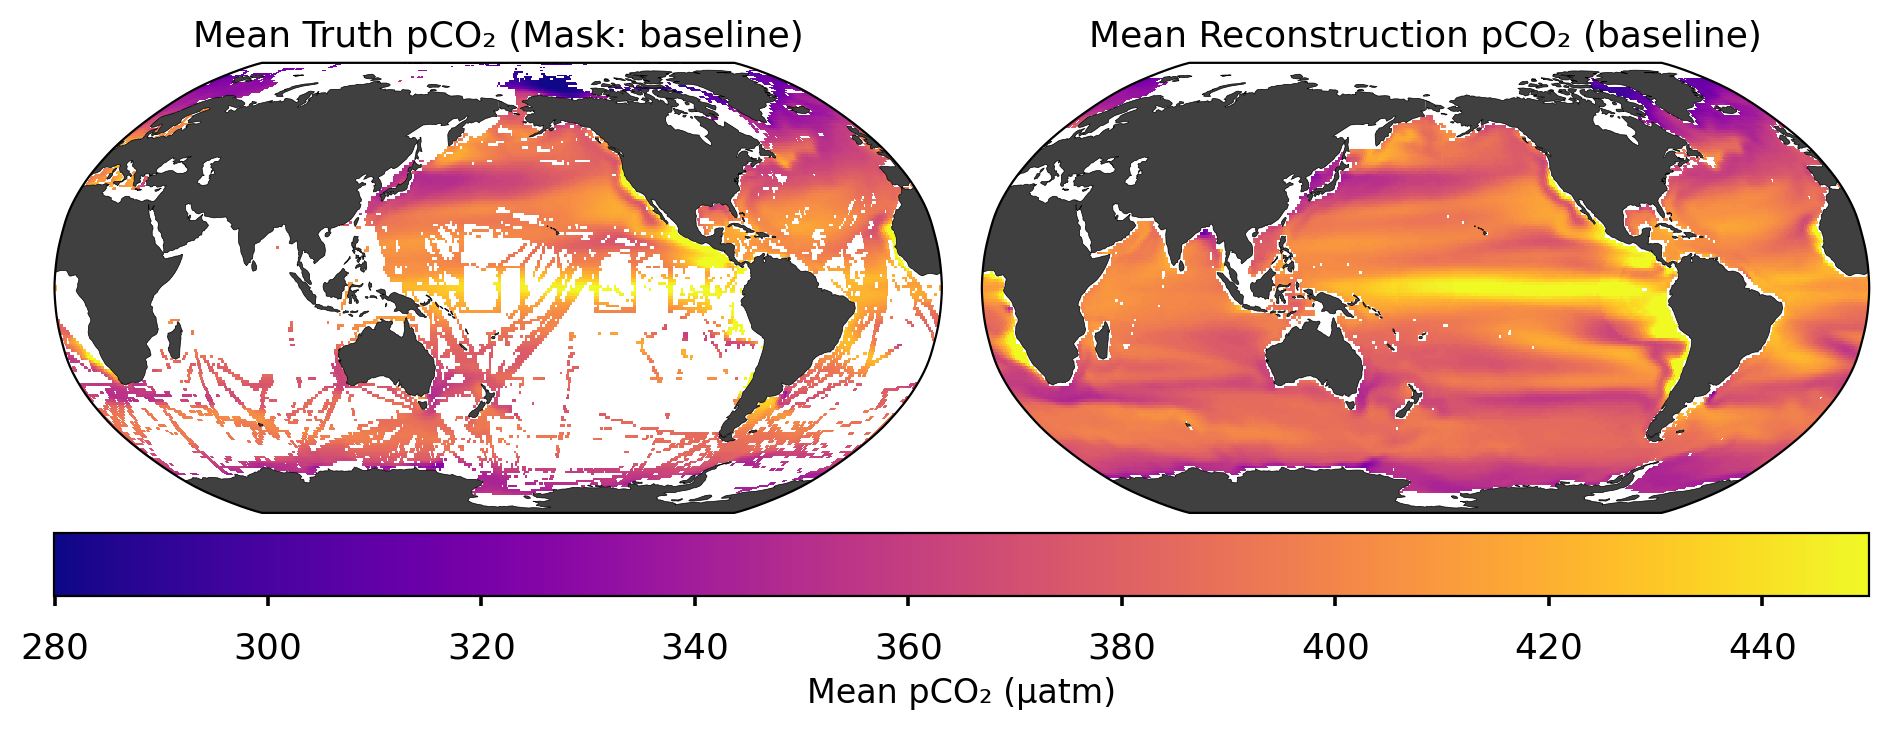

Plotting complete.


In [20]:
plot_reconstruction_vs_truth(
   mask_name="baseline",          # Choose the mask scenario
   mask_data_dict=mask_data_dict,
   selected_mems_dict=selected_mems_dict,
   ensemble_dir=ensemble_dir,
   output_dir=output_dir,
   dates=dates,
   init_date=init_date,
   fin_date=fin_date,
   vrange=[280,450],             # Optional: Adjust range
   cmap_data='plasma'            # Optional: Choose colormap
)

##### B. Average Standard Deviation of Pred Dists over timeseries

Loading STD from: gs://leap-persistent/donvic777/azamkhan99/pco2_residual/nmse/post02_xgb/reconstructions/baseline/ACCESS-ESM1-5/member_r10i1p1f1/recon_pCO2_ACCESS-ESM1-5_member_r10i1p1f1_mon_1x1_200401_202312.zarr
Generating plot...


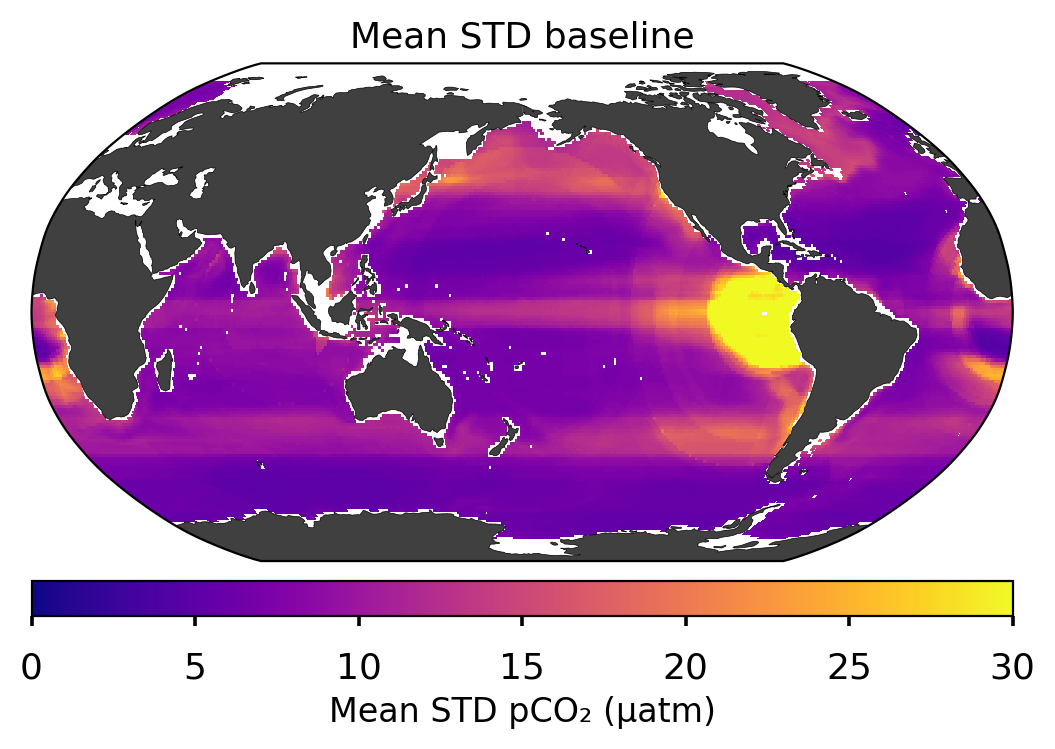

Plotting complete.


In [21]:
plot_reconstruction_std_single(
    mask_name="baseline",
    selected_mems_dict=selected_mems_dict,
    output_dir=output_dir,
    init_date=init_date,
    fin_date=fin_date,
    vrange=[0, 30],
    cmap_std="plasma",
)

##### C. Statistical Significance of pCO2 Reconstructions using Baseline Mask

Number of valid (non-NaN) p-values: 33821
Significant areas (p < 0.05): 22575 pixels (66.7%)


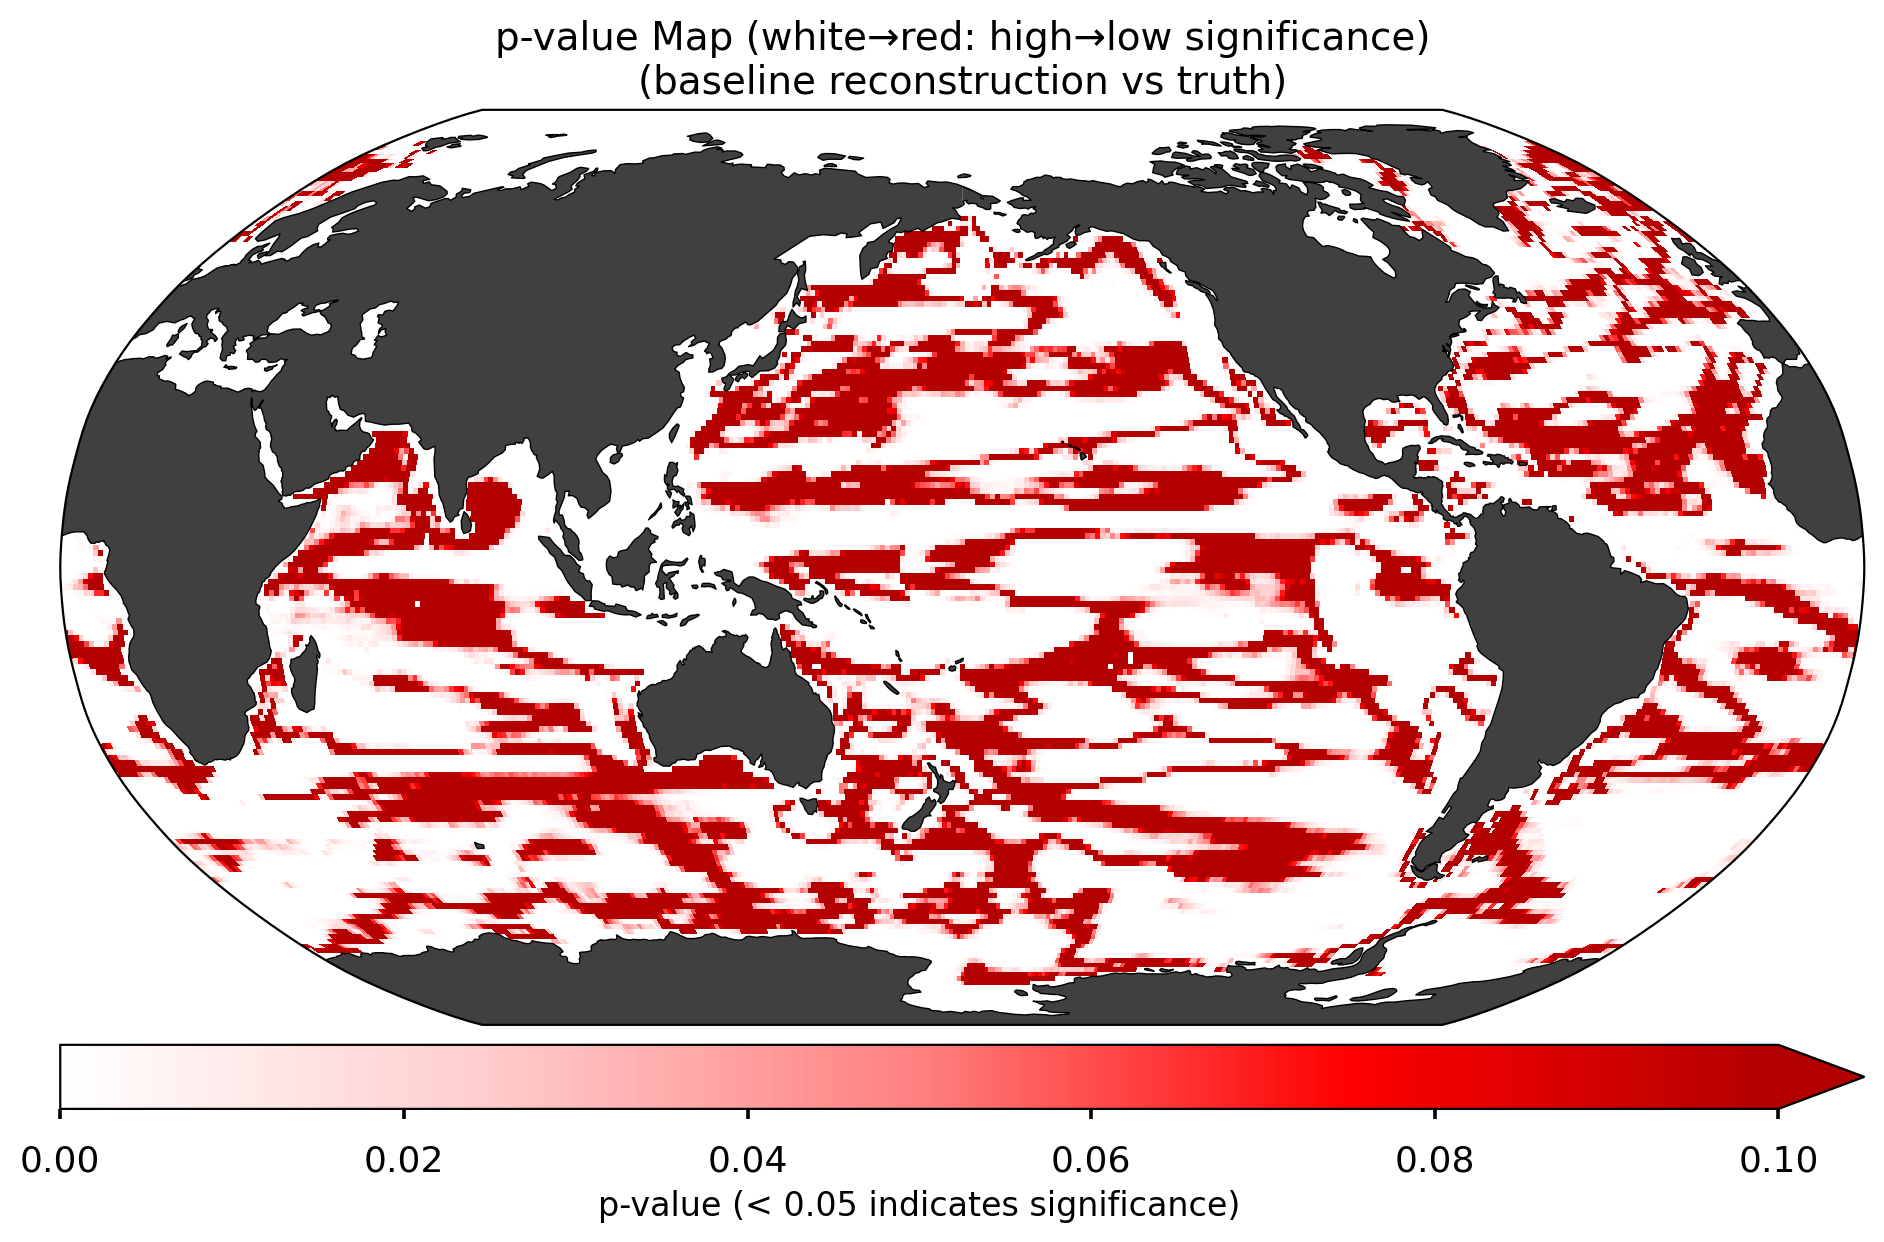

In [28]:
show_baseline_pvalue_plot(
    selected_mems_dict=selected_mems_dict,
    output_dir=output_dir,
    init_date=init_date,
    fin_date=fin_date
)

**Observations**

1. ⁠Greater pCO2 along western coasts of Africa and the Americas as well as by the equator
2. ⁠⁠Standard deviation follows similar patterns as mean pCO2 (at smaller magnitude)
3. ⁠⁠⁠Around 67% of pCO2 reconstructions statistically significant

## 4.2 Comparison of Baseline vs models trained on more data

In [23]:
output_dir = f"gs://leap-persistent/{owner_username}/{owner_username}/pco2_residual/{grid_search_approach}/post02_xgb"  # where to save machine learning results

### 4.2.1 Analyze data added to locations historically sampled

Adding sampling data affects model results, notably changing means and reducing standard deviations in sampling areas.
- Changes in means and Reductions in standard deviations become greater, the more you add data
- Concentrated adds of data (expand) produce greater changes in local standard deviations and means than more dispersed adds (densify)

##### As a reminder:

| Mask Name              | Description                                     | Increase |
|------------------------|-------------------------------------------------|----------|
| `densify_mean_pattern` | Raise low-sampled locations to global mean      | +14%     |
| `densify_30p`          | Ensure ≥ 7 months per sampled grid cell         | +30%     |
| `densify_50p`          | Ensure ≥ 10 months per sampled grid cell        | +50%     |


**Observations**

1. ⁠Greater pCO2 along western coasts of Africa and the Americas as well as by the equator
2. ⁠⁠Standard deviation follows similar patterns as mean pCO2 (at smaller magnitude)
3. ⁠⁠⁠Around 67% of pCO2 reconstructions statistically significant

## 4.2 Comparison of Baseline vs models trained on more data

### 4.2.1 Analyze data added to locations historically sampled

Adding sampling data affects model results, notably changing means and reducing standard deviations in sampling areas.
- Changes in means and Reductions in standard deviations become greater, the more you add data
- Concentrated adds of data (expand) produce greater changes in local standard deviations and means than more dispersed adds (densify)

##### As a reminder:

| Mask Name              | Description                                     | Increase |
|------------------------|-------------------------------------------------|----------|
| `densify_mean_pattern` | Raise low-sampled locations to global mean      | +14%     |
| `densify_30p`          | Ensure ≥ 7 months per sampled grid cell         | +30%     |
| `densify_50p`          | Ensure ≥ 10 months per sampled grid cell        | +50%     |


Reconstruction Panel showing how the **densify_mean_pattern** mask performs compared to the **baseline** mask:

Calculating p-value map...
Number of valid (non-NaN) p-values: 33682
Significant areas (p < 0.05): 26822 pixels (79.6%)


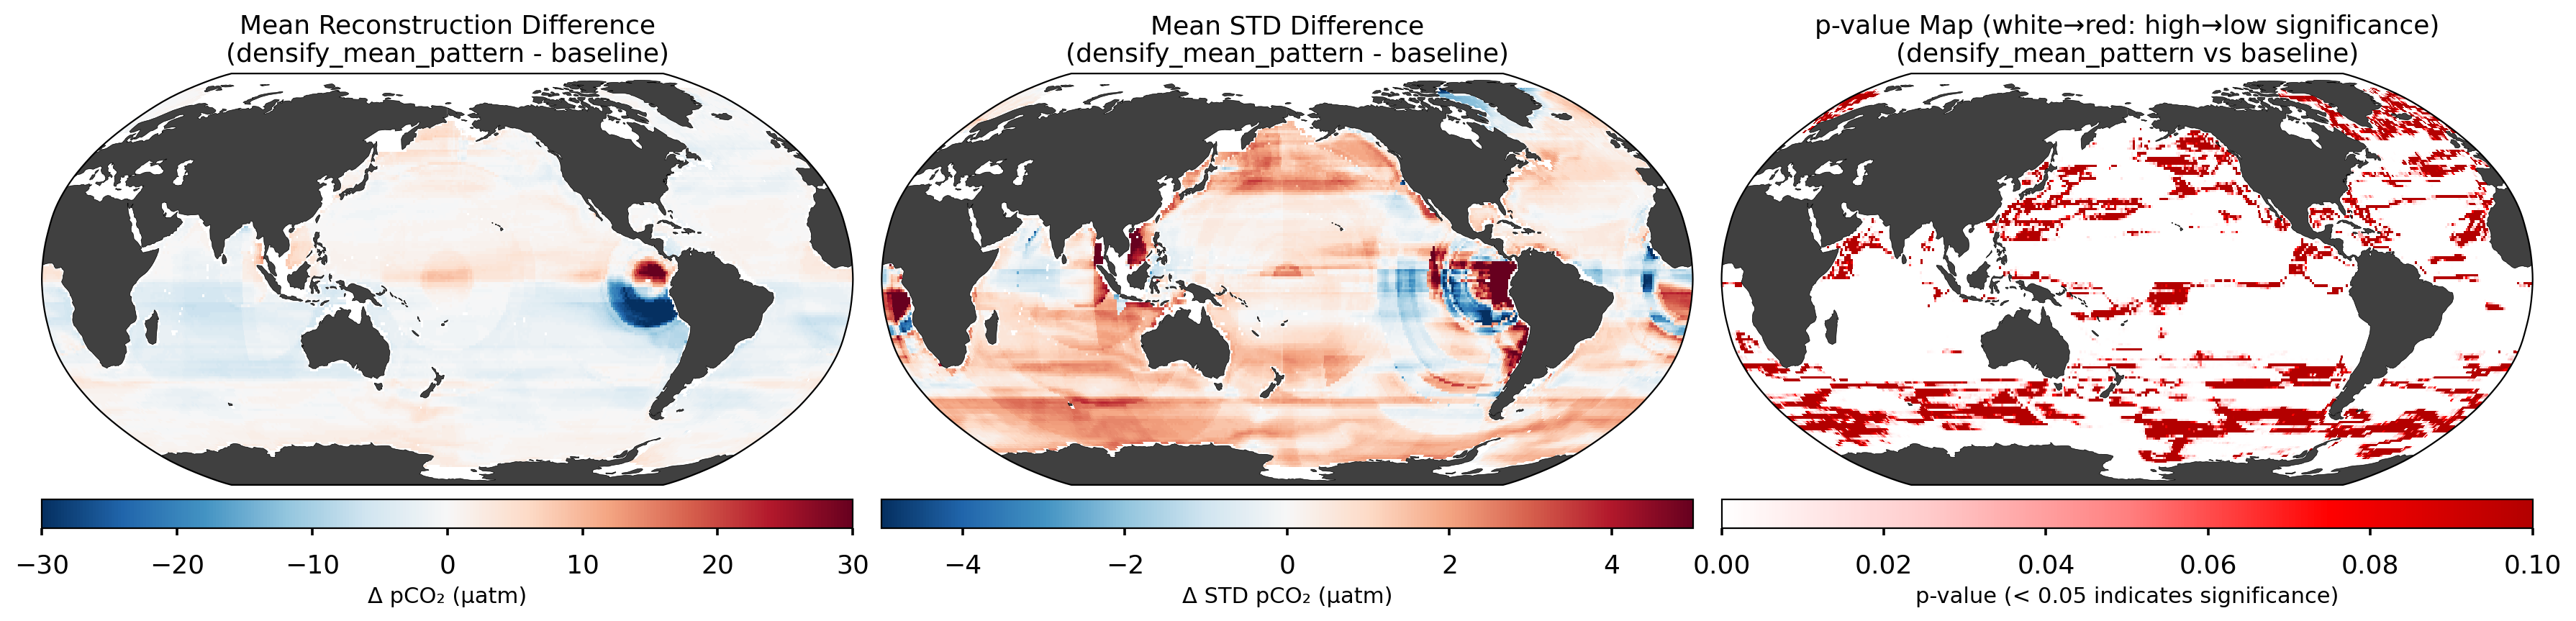

Plotting complete.


Reconstruction Panel showing how the **densify_30p** mask performs compared to the **baseline** mask:

Calculating p-value map...
Number of valid (non-NaN) p-values: 33682
Significant areas (p < 0.05): 25474 pixels (75.6%)


In [ ]:
printmd(
    "Reconstruction Panel showing how the **densify_mean_pattern** mask performs compared to the **baseline** mask:"
)

plot_reconstruction_comparison_panel_full(
    mask_name_1="baseline",
    mask_name_2="densify_mean_pattern",
    selected_mems_dict=selected_mems_dict,
    output_dir=output_dir,
    init_date=init_date,
    fin_date=fin_date,
)

printmd(
    "Reconstruction Panel showing how the **densify_30p** mask performs compared to the **baseline** mask:"
)

plot_reconstruction_comparison_panel_full(
    mask_name_1="baseline",
    mask_name_2="densify_30p",
    selected_mems_dict=selected_mems_dict,
    output_dir=output_dir,
    init_date=init_date,
    fin_date=fin_date,
)

printmd(
    "Reconstruction Panel showing how the **densify_50p** mask performs compared to the **baseline** mask:"
)

plot_reconstruction_comparison_panel_full(
    mask_name_1="baseline",
    mask_name_2="densify_50p",
    selected_mems_dict=selected_mems_dict,
    output_dir=output_dir,
    init_date=init_date,
    fin_date=fin_date,
)

#### Key Observation:
As we increase the amount of data added, the percentage of statistically significant areas **decreases** slightly:

| Sampling Increase | Significant Area (%) |
|-------------------|----------------------|
| 14% (densify_mean_pattern) | **79.6%** |
| 30% (densify_30p)           | **75.6%** |
| 50% (densify_50p)           | **71.8%** |

#### Why does this happen?

At first glance, this may seem counterintuitive. But here's what's going on:

- Adding more observations improves the model’s stability and reduces reconstruction errors.
- That means the **difference** between reconstruction and truth becomes smaller.
- This leads to a **lower t-statistic**, and therefore a **higher p-value**, which causes **fewer pixels to be marked significant** (p < 0.05).

####  T-Test Formula:

We apply a **paired t-test** to compare the baseline reconstruction with the ground truth across time. The test checks whether the **mean difference** between reconstruction and truth is significantly different from zero.

The t-statistic is computed as:

$$
t = \frac{\bar{d}}{s_d / \sqrt{n}}
$$

Where:
- $\bar{d}$ = mean difference across time (reconstruction − truth)
- $s_d$ = standard deviation of the differences
- $n$ = number of time steps


So although **significance decreases**, this actually reflects **better model agreement with the truth**.

### 4.2.2 Analyze data added to new locations not historically sampled

##### As a reminder:

| Mask Name      | Description                                             | Increase |
|----------------|---------------------------------------------------------|----------|
| `expand_14p`   | Add new grid cells in S. Ocean, Indian, Pacific regions | +14%     |
| `expand_30p`   | 100 new points per basin, moderate sampling             | +30%     |
| `expand_50p`   | 200 new points per basin, dense sampling                | +50%     |

In [ ]:
printmd(
    "#### Reconstruction Panel showing how the **expand_14p** mask performs compared to the **baseline** mask:"
)

plot_reconstruction_comparison_panel_full(
    mask_name_1="baseline",
    mask_name_2="expand_14p",
    selected_mems_dict=selected_mems_dict,
    output_dir=output_dir,
    init_date=init_date,
    fin_date=fin_date,
)

printmd(
    "#### Reconstruction Panel showing how the **expand_30p** mask performs compared to the **baseline** mask:"
)

plot_reconstruction_comparison_panel_full(
    mask_name_1="baseline",
    mask_name_2="expand_30p",
    selected_mems_dict=selected_mems_dict,
    output_dir=output_dir,
    init_date=init_date,
    fin_date=fin_date,
)

printmd(
    "#### Reconstruction Panel showing how the **expand_50p** mask performs compared to the **baseline** mask:"
)

plot_reconstruction_comparison_panel_full(
    mask_name_1="baseline",
    mask_name_2="expand_50p",
    selected_mems_dict=selected_mems_dict,
    output_dir=output_dir,
    init_date=init_date,
    fin_date=fin_date,
)

This section analyzes how adding **new observations** at previously unsampled locations affects model confidence.

#### Summary of Results:

| New Sampling Increase | Significant Area (%) |
|-----------------------|----------------------|
| 14% (expand_14p)      | 75.5%                |
| 30% (expand_30p)      | 78.8%                |
| 50% (expand_50p)      | 77.7%                |

#### Key Insights:

- Adding new spatial coverage improves the reconstruction’s statistical confidence.
- The highest improvement is seen at **30%**, suggesting a sweet spot in how much expansion helps.
- Compared to densifying existing locations, **expansion into new regions** tends to yield better gains in significance.
- This implies that focusing future pCO₂ sampling efforts in **undersampled ocean regions** (e.g., Southern, Indian, South Pacific) could meaningfully improve reconstruction reliability.


# 5. Reproducibility - checking additional members

#### P-value Analysis
This section visualizes the p-value analysis of the reconstruction results for the **baseline** mask, 
the **densify_50p** mask, and the **expand_50p** mask. The analysis highlights the differences across 
three members of the **ACCESS-ESM1-5** model, providing insights into the statistical significance 
of the reconstructions.


Loading data and calculating p-values...

Creating side-by-side p-value plots...


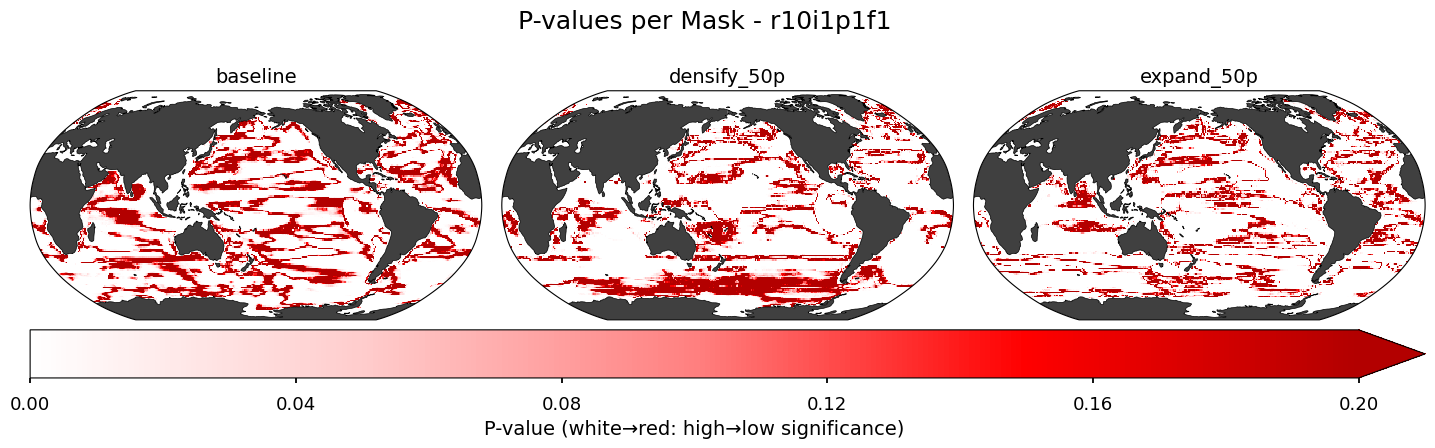

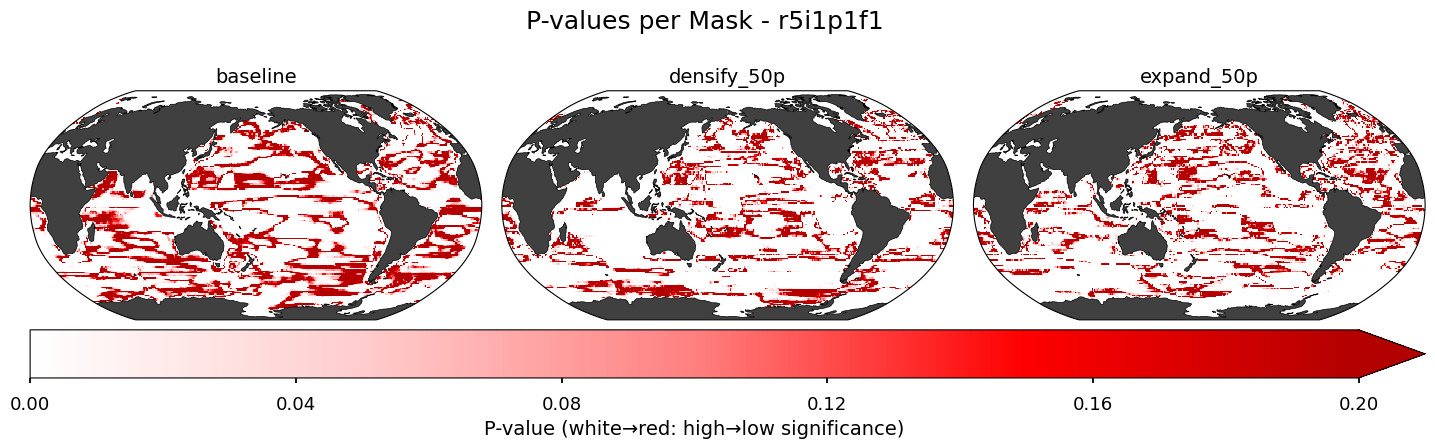

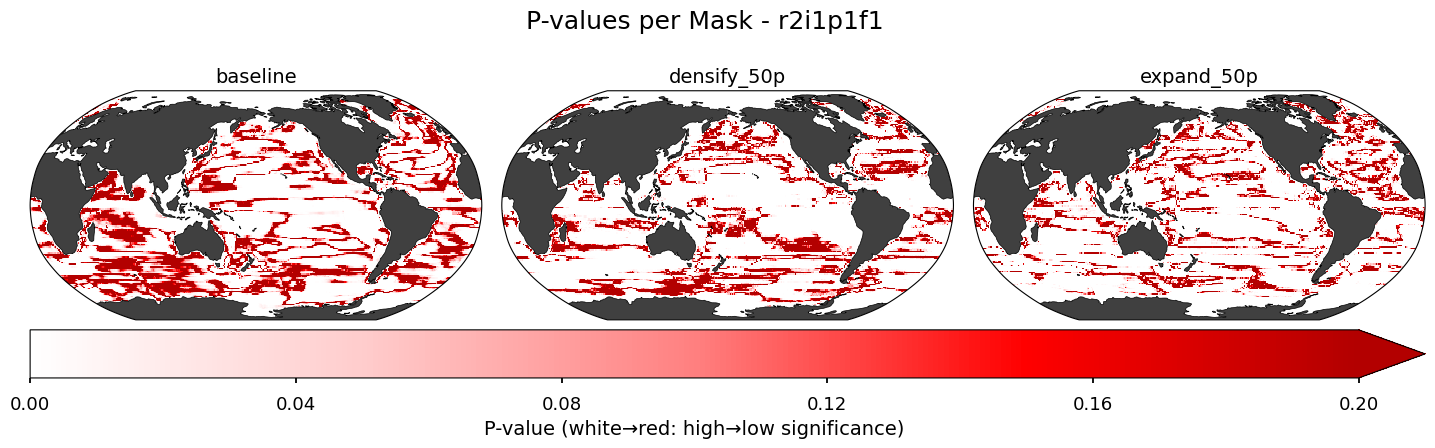


Calculating statistics...

Statistical Summary:
Member     Mask Type       Significant Area %   Mean P-value   
----------------------------------------------------------------------
r10i1p1f1  baseline                       66.75%          0.1359
r10i1p1f1  densify_50p                    71.78%          0.1204
r10i1p1f1  expand_50p                     77.74%          0.0914
r5i1p1f1   baseline                       65.89%          0.1376
r5i1p1f1   densify_50p                    77.17%          0.0952
r5i1p1f1   expand_50p                     77.44%          0.0931
r2i1p1f1   baseline                       64.55%          0.1446
r2i1p1f1   densify_50p                    73.87%          0.1092
r2i1p1f1   expand_50p                     78.96%          0.0847


In [94]:
# Main Execution
print("\nLoading data and calculating p-values...")
all_member_data = {}

for esm, mem_list in selected_mems_dict.items():
    for mem in mem_list:
        all_member_data[mem] = {}
        truth_data, baseline_recon = load_reconstruction('baseline', mem, output_dir, esm, init_date, fin_date)
        if truth_data is not None and baseline_recon is not None:
            all_member_data[mem]['baseline'] = pacific_center(calculate_p_value(baseline_recon, truth_data))
            for mask_type in ['densify_50p', 'expand_50p']:
                var_name, mask_recon = load_reconstruction(mask_type, mem, output_dir, esm, init_date, fin_date)
                if mask_recon is not None:
                    all_member_data[mem][mask_type] = pacific_center(calculate_p_value(mask_recon, baseline_recon))
if all_member_data:
    print("\nCreating side-by-side p-value plots...")
    create_side_by_side_pvalue_plot(all_member_data)
    print("\nCalculating statistics...")
    stats = calculate_grid_stats(all_member_data)
else:
    print("No data found. Analysis cannot proceed.")

In this section, we validate whether the impact of adding more pCO₂ observations is consistent across different ensemble members. We analyze the statistical significance of reconstruction results for three ACCESS-ESM1-5 members: `r10i1p1f1`, `r5i1p1f1`, and `r2i1p1f1`.

### Key Takeaways

- **Expand strategies consistently outperform densify**, both in terms of area with significant improvement and lower average p-values.
- This **trend holds across all three members**, which confirms the robustness and reproducibility of our findings.
- Adding **new observations in previously unsampled locations** appears to improve model confidence more effectively than simply adding more data where we already have measurements.
- This suggests that future efforts to improve ocean carbon reconstructions should prioritize **expanding sampling networks** to new regions—especially in the Southern Ocean and equatorial Pacific.

> This reproducibility check gives us greater confidence in the reliability of our recommendation: expanding observation coverage is statistically more effective than densifying current measurements.


# 6. Seasonality 

This section visualizes the **seasonal mean difference in reconstructed surface ocean pCO₂** between our modified masks and the `baseline` mask.

For each season (Winter, Spring, Summer, Autumn), the plots show:

$$
\Delta \text{pCO₂}_\text{seasonal} = \text{Mean pCO₂}_{\text{new mask}} - \text{Mean pCO₂}_{\text{baseline}}
$$

These visualizations allow us to:

- **Quantify the impact of additional observations** on seasonal pCO₂ estimates.
- **Compare the effects of different sampling strategies**, including expanding locations and densification of already sampled locations.
- **Identify spatial and seasonal patterns** in reconstruction sensitivity, highlighting regions where added data most affects predictions.

**Seasonal Analysis:** Difference between `densify_mean_pattern` and `baseline` mask

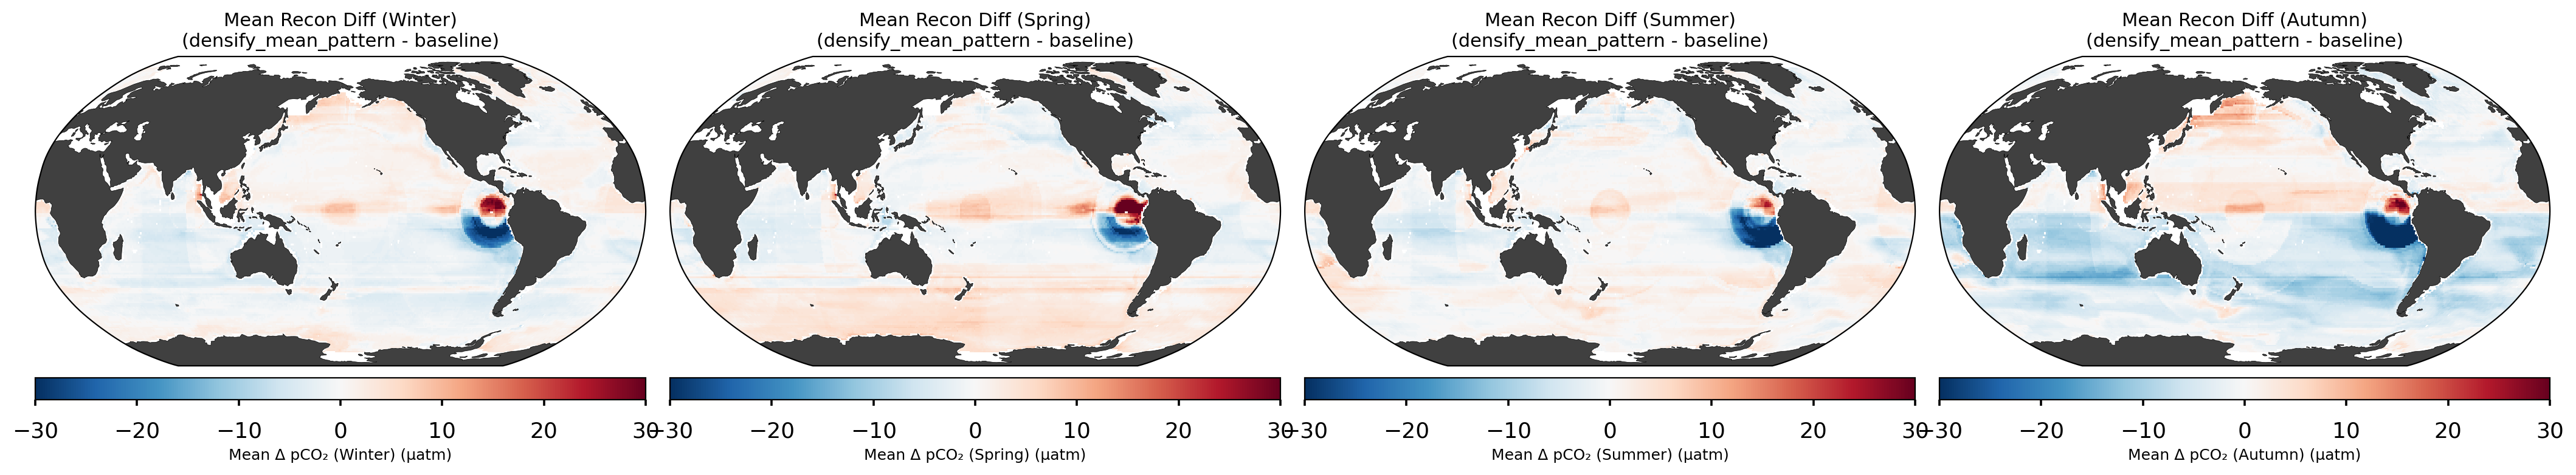

**Seasonal Analysis:** Difference between `densify_30p` and `baseline` mask

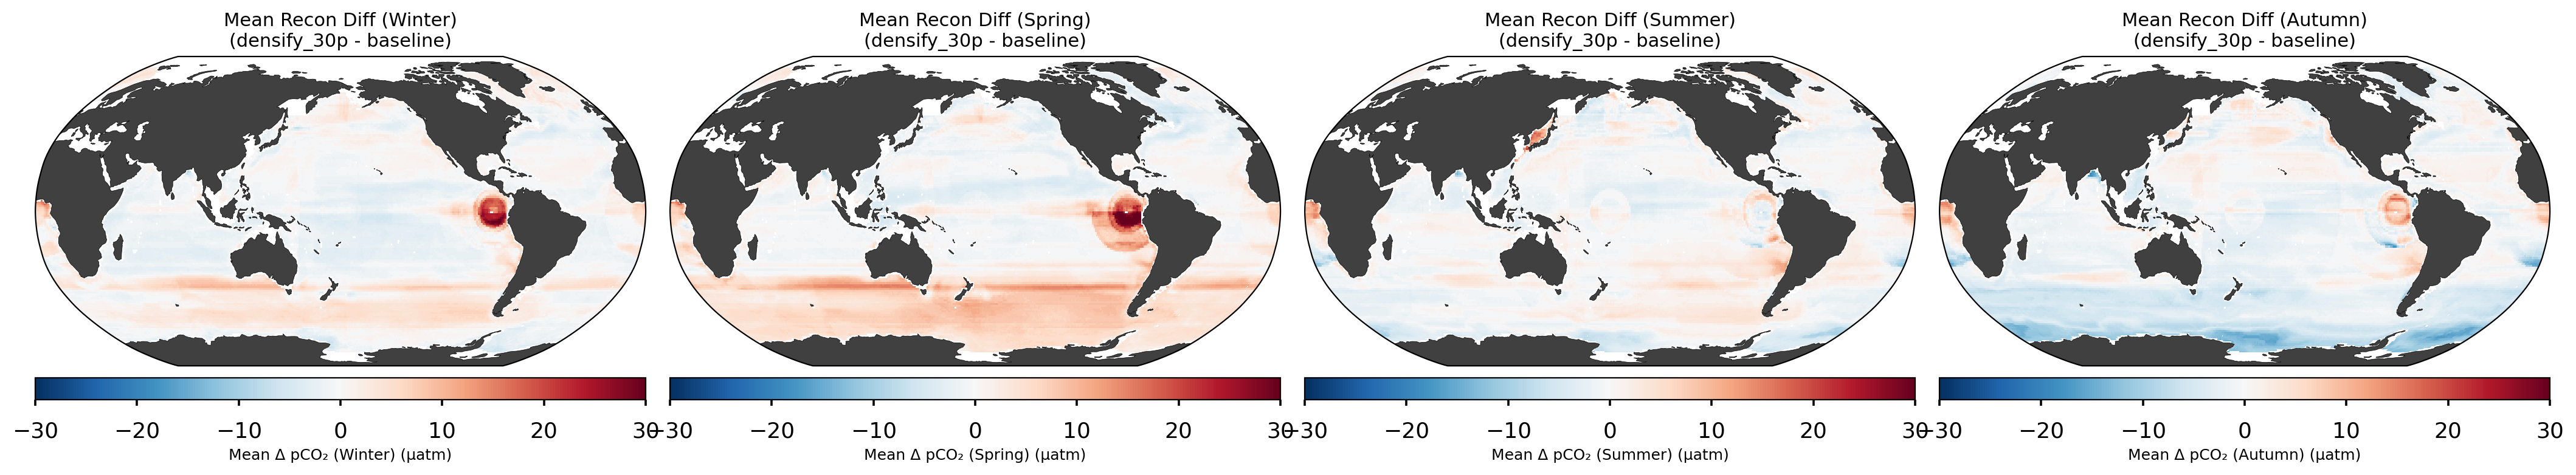

**Seasonal Analysis:** Difference between `densify_50p` and `baseline` mask

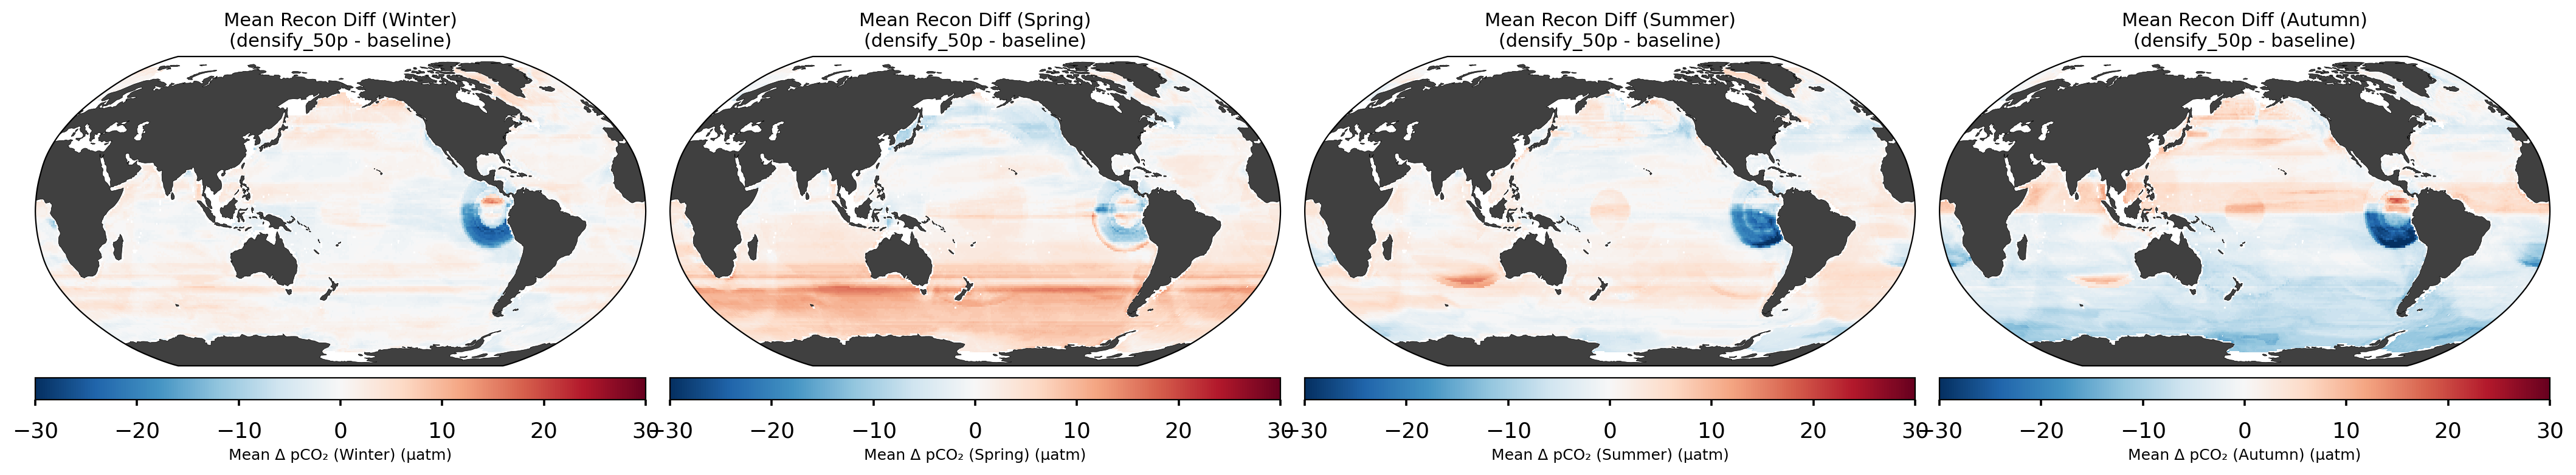

In [97]:
printmd("**Seasonal Analysis:** Difference between `densify_mean_pattern` and `baseline` mask")

plot_seasonal_difference_panel_1x4(
    mask_name_1="baseline",
    mask_name_2="densify_mean_pattern",
    selected_mems_dict=selected_mems_dict,
    ensemble_dir=ensemble_dir,
    output_dir=output_dir,
    init_date=init_date,
    fin_date=fin_date,
    diff_vrange=[-30, 30],
    cmap_diff="RdBu_r",
)

printmd(
    "**Seasonal Analysis:** Difference between `densify_30p` and `baseline` mask"
)

plot_seasonal_difference_panel_1x4(
    mask_name_1="baseline",
    mask_name_2="densify_30p",
    selected_mems_dict=selected_mems_dict,
    ensemble_dir=ensemble_dir,
    output_dir=output_dir,
    init_date=init_date,
    fin_date=fin_date,
    diff_vrange=[-30, 30],
    cmap_diff="RdBu_r",
)

printmd("**Seasonal Analysis:** Difference between `densify_50p` and `baseline` mask")

plot_seasonal_difference_panel_1x4(
    mask_name_1="baseline",
    mask_name_2="densify_50p",
    selected_mems_dict=selected_mems_dict,
    ensemble_dir=ensemble_dir,
    output_dir=output_dir,
    init_date=init_date,
    fin_date=fin_date,
    diff_vrange=[-30, 30],
    cmap_diff="RdBu_r",
)

**Seasonal Analysis:** Difference between `expand_14p` and `baseline` mask

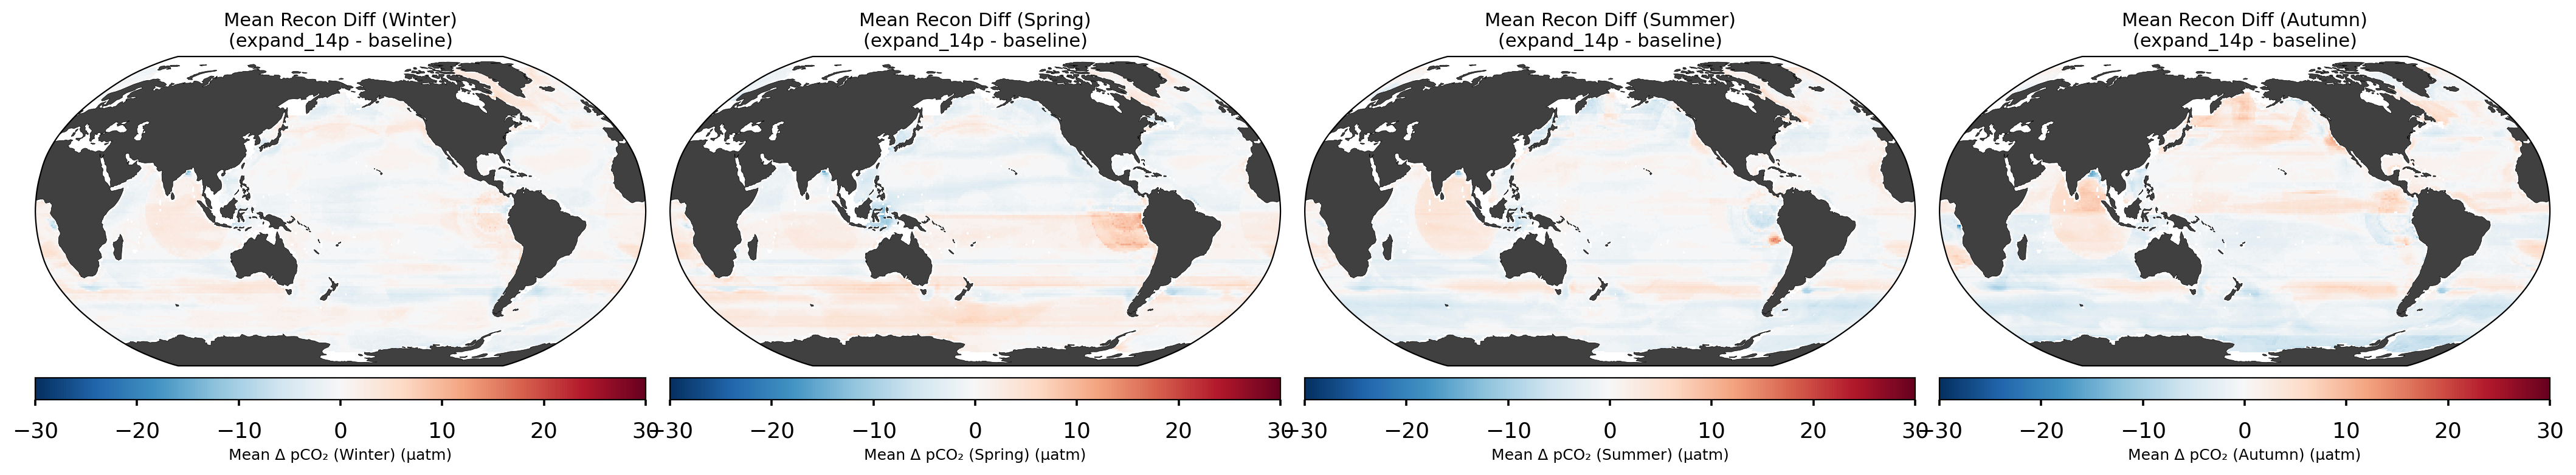

**Seasonal Analysis:** Difference between `expand_30p` and `baseline` mask

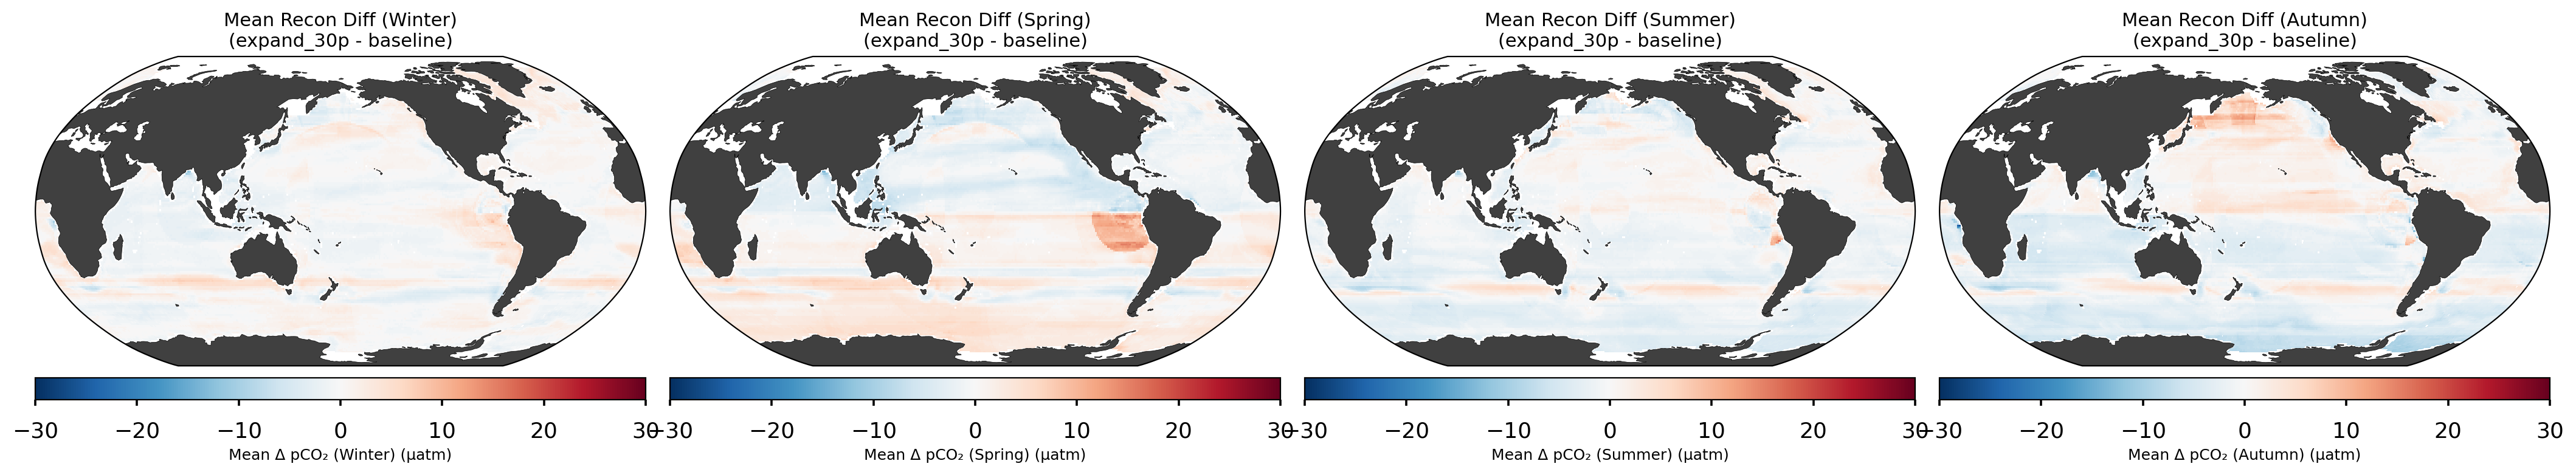

**Seasonal Analysis:** Difference between `expand_50p` and `baseline` mask

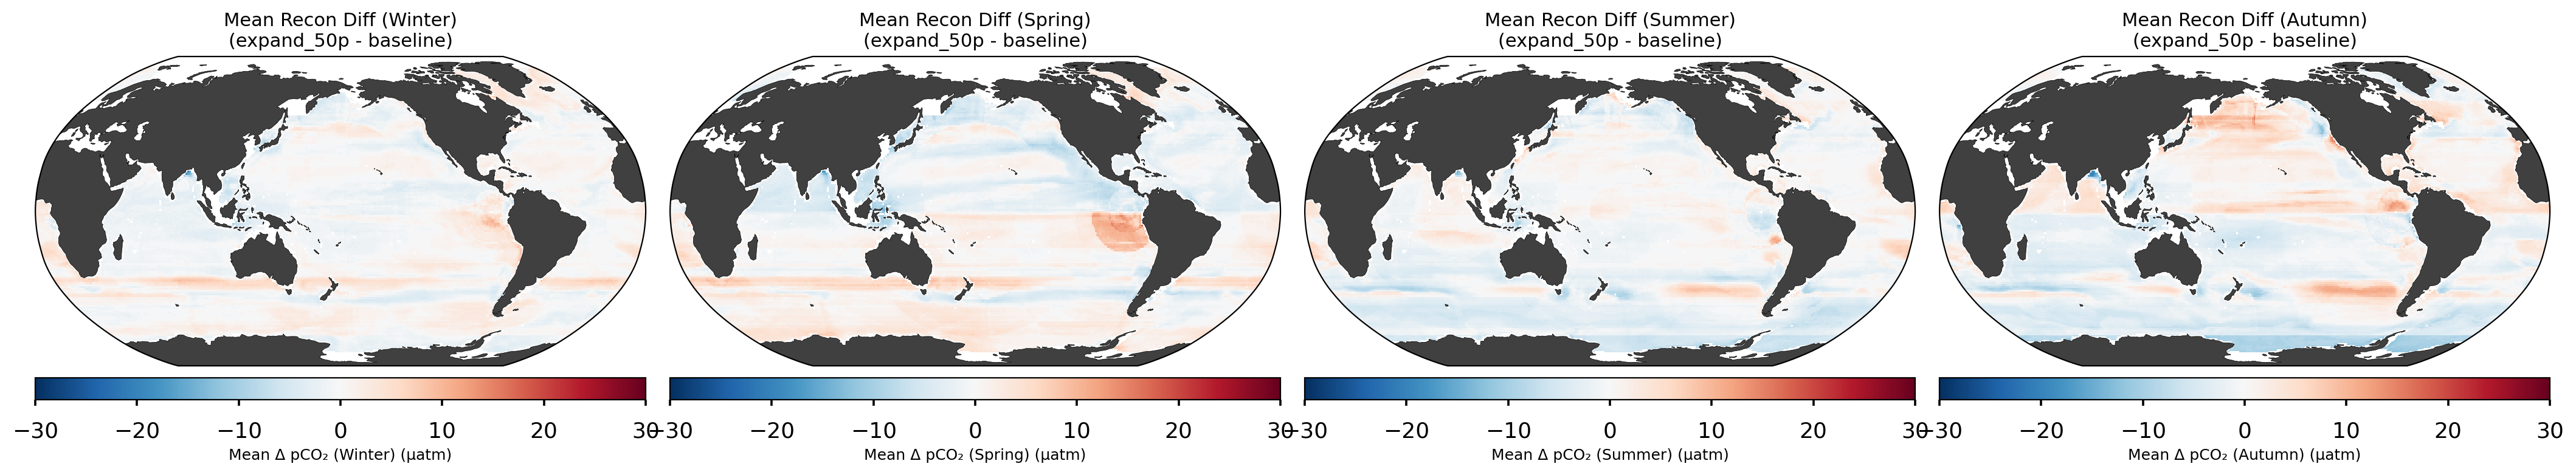

In [98]:
printmd(
    "**Seasonal Analysis:** Difference between `expand_14p` and `baseline` mask"
)

plot_seasonal_difference_panel_1x4(
    mask_name_1="baseline",
    mask_name_2="expand_14p",
    selected_mems_dict=selected_mems_dict,
    ensemble_dir=ensemble_dir,
    output_dir=output_dir,
    init_date=init_date,
    fin_date=fin_date,
    diff_vrange=[-30, 30],
    cmap_diff="RdBu_r",
)

printmd("**Seasonal Analysis:** Difference between `expand_30p` and `baseline` mask")

plot_seasonal_difference_panel_1x4(
    mask_name_1="baseline",
    mask_name_2="expand_30p",
    selected_mems_dict=selected_mems_dict,
    ensemble_dir=ensemble_dir,
    output_dir=output_dir,
    init_date=init_date,
    fin_date=fin_date,
    diff_vrange=[-30, 30],
    cmap_diff="RdBu_r",
)

printmd("**Seasonal Analysis:** Difference between `expand_50p` and `baseline` mask")

plot_seasonal_difference_panel_1x4(
   mask_name_1="baseline",
   mask_name_2="expand_50p",
   selected_mems_dict=selected_mems_dict,
   ensemble_dir=ensemble_dir,
   output_dir=output_dir,
   init_date=init_date,
   fin_date=fin_date,
   diff_vrange=[-30, 30],
   cmap_diff="RdBu_r",
)

**Observations:**

See greater changes to model pCO2 results compared to baseline when add sampling data in Autumn and Spring. Results hold for both the dispersed add to locations already historically sampled, or when adding sampling in a concentrated manner/in previously unsampled locations.

Autumn and Spring are generally times of more flux in ocean CO2, so capturing greater accuracy may be of special concern to scientists.

# 7. Conclusions

## **Findings**
**Baseline**
1. Mean pCO2 varies from 220 - 440 uatm. There is generally greater pCO2 off the western coasts of Africa and the Americas as well as by the equator. Lower pCO2 levels are seen closer to the poles.
2. Standard deviation pattern somewhat resembles the pCO2 patterns, with greater standard deviations by the western coasts of Africa and the Americas as well as by the equater, and lower standard deviations by the poles.
3. Note on statistical significance

**Adding Sampling**
1. Adding data changes model averages
2. See reduced standard deviations of pCO2 in areas where add hypothetical observations. Get larger local standard deviation reductions by increasing data additions, or by concentrating the data sampling.
3. Adding samples increases the amount of statistical significances. The more data added, the more statistically confident the results.
4. The denser additions seen with the new location data adds increases statistical confidence of the pCO2 reconstructions more that the dispersed sampling additions.

**Reproducibility**
1. Results are reproducible across members, with statistical significance increasing in areas where add additional values

**Seasonality**
1. greater changes to model pCO2 results compared to baseline when add sampling data in Autumn and Spring

## **Real World implications**
1. The pCO2 results are generally accurate, with 67% of the globe showing average results that are statistically significant
2. Adding observations can reduce variability of data and increase
3. There is opportunity to increase statistical confidence of model pCO2 by focusing on adding samples to areas with high standard deviations (western coasts of Africa and the Americas and regions closer to the equator).
4. Opportunity to concentrated new sampling in Spring & Autumn months when see greatest change in model data from baseline.
5. Opportunity to increase statistical confidence by adding new sampling data in a concentrated pattern than a dispersed pattern. 

## **Further Research**
1. Opportunity to extend research across various ESMs, beyond the one chosen for the analysis
2. Further exploration is needed to look beyond just average values, taking a deeper look at times of greater variation in pCO2, and diving into particular regions with greater variability.
3. Necessity to test adding data in patterns that more resemble what would be seen in the actual world, both in sampling dispersion and frequency.

## **Team & Contribution**

Group 1:
- Sarah Pariser: Created masks; streamlined code/story; contributed to introduction & conclusion
- Azam Khan: Setup pipeline to train ngboost models; wrote visualization functions & analysis
- Bokai He: Statistical significance analysis, including p-value & t-test; NGBoost & XGBoost comparison
- Victor Wang: Seasonality analysis & visualization